# ML-project House_price_prediction


In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv("synthetic_real_estate_data (1).xls")

In [5]:
df.head(1)

,Area_sqft,Bedrooms,Bathrooms,Age,Distance_to_CityCenter_km,Price
0,1748.357077,1,1,43,11.268221,74482.867074


In [6]:
df.shape

(20000, 6)

In [7]:
df.duplicated().sum()

np.int64(0)

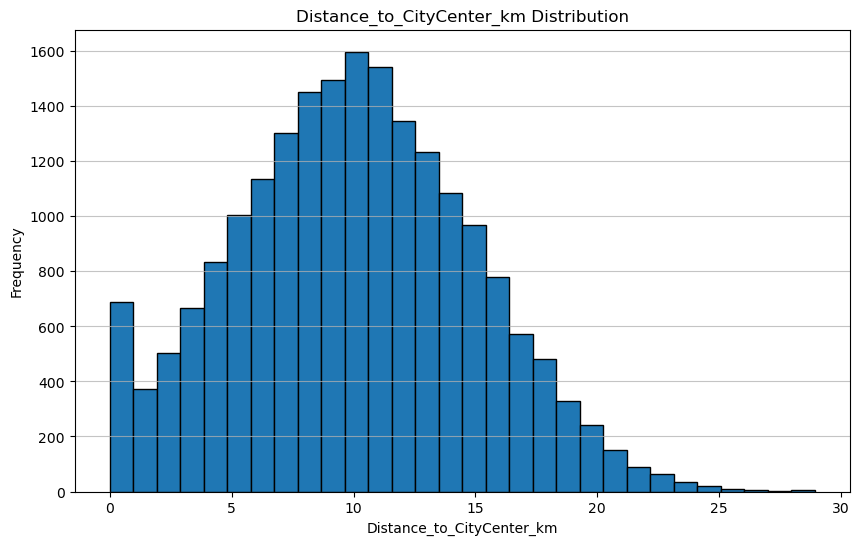

In [8]:
plt.figure(figsize=(10, 6))
plt.hist(df['Distance_to_CityCenter_km'], bins=30, edgecolor='black')  
plt.title('Distance_to_CityCenter_km Distribution')
plt.xlabel('Distance_to_CityCenter_km')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()

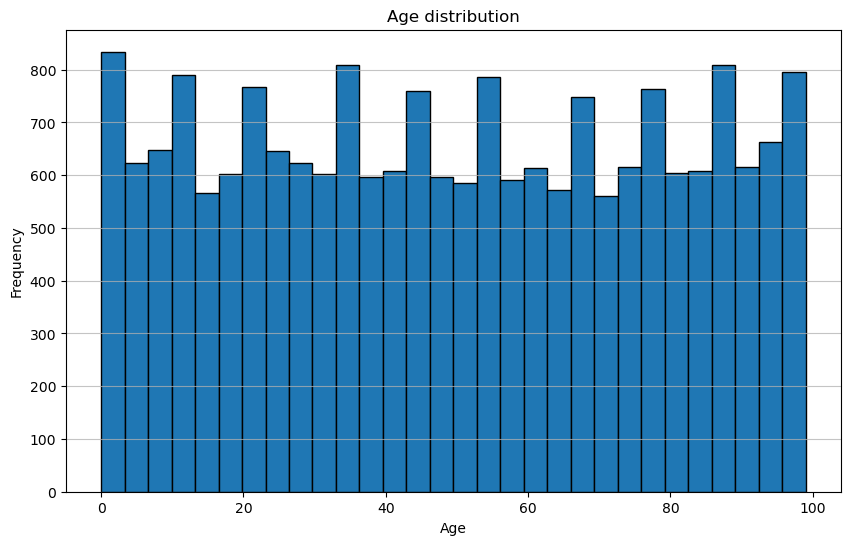

In [9]:
plt.figure(figsize=(10, 6))
plt.hist(df['Age'], bins=30, edgecolor='black')
plt.title('Age distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()

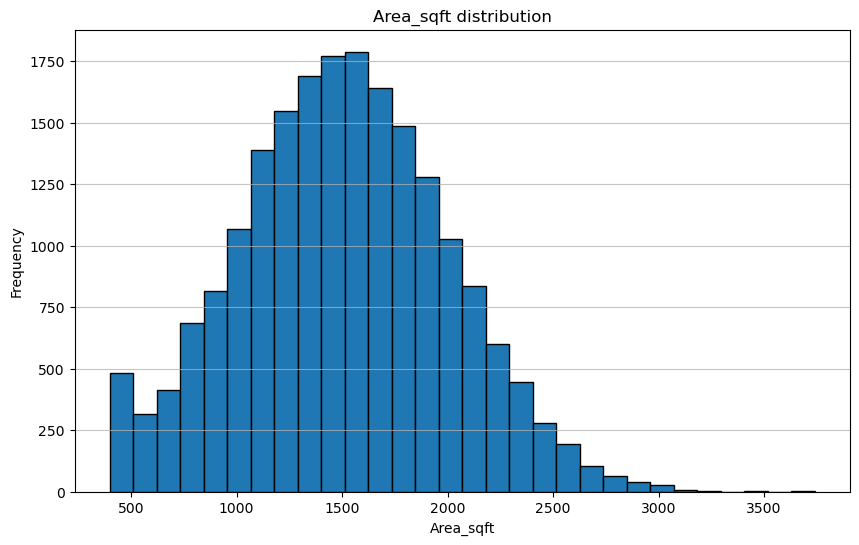

In [10]:
plt.figure(figsize=(10, 6))
plt.hist(df['Area_sqft'], bins=30, edgecolor='black')
plt.title('Area_sqft distribution')
plt.xlabel('Area_sqft')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()

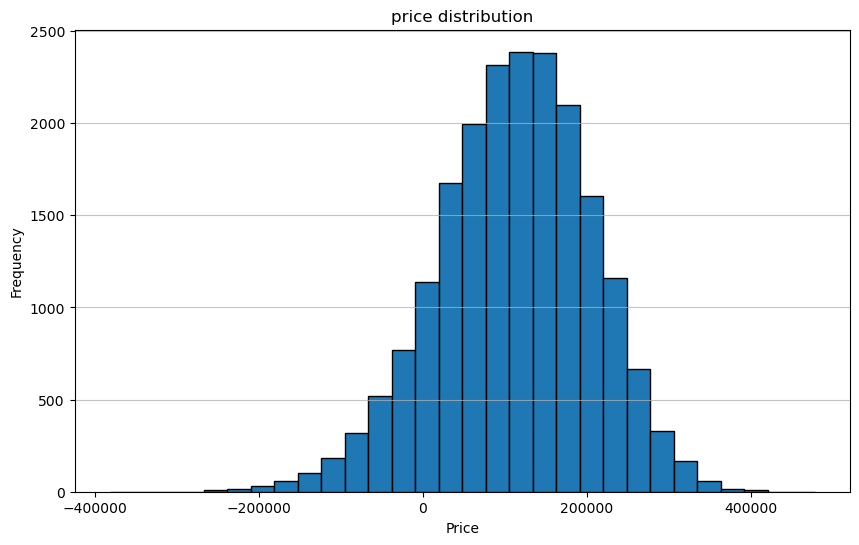

In [11]:
plt.figure(figsize=(10, 6))
plt.hist(df['Price'], bins=30, edgecolor='black')
plt.title('price distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()

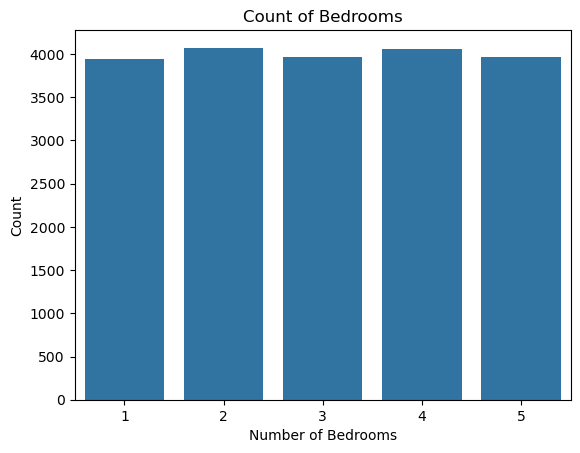

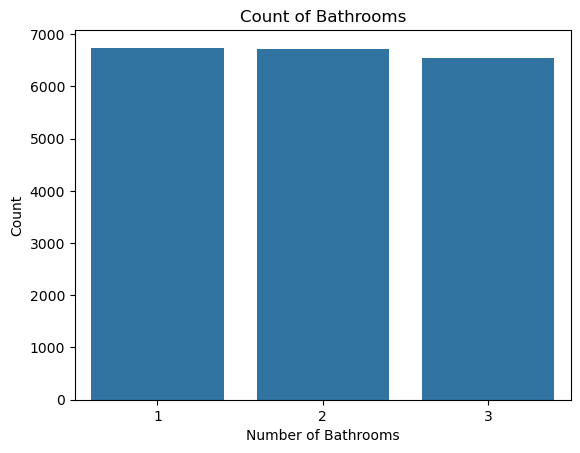

In [12]:
# Bedrooms ka count plot
sns.countplot(x='Bedrooms', data=df)
plt.title('Count of Bedrooms')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Count')
plt.show()

# Bathrooms ka count plot
sns.countplot(x='Bathrooms', data=df)
plt.title('Count of Bathrooms')
plt.xlabel('Number of Bathrooms')
plt.ylabel('Count')
plt.show()

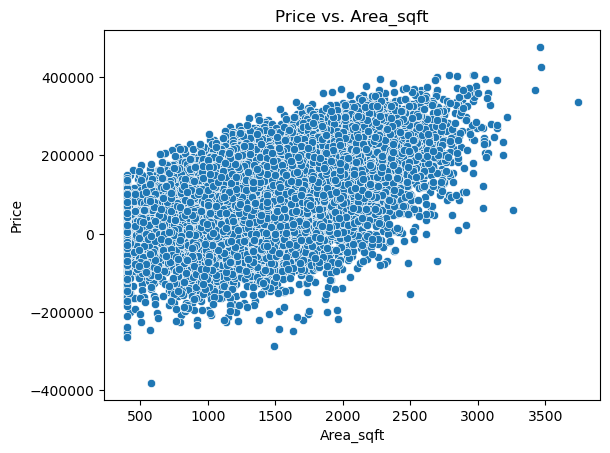

In [13]:
sns.scatterplot(x='Area_sqft', y='Price', data=df)
plt.title('Price vs. Area_sqft')
plt.xlabel('Area_sqft')
plt.ylabel('Price')
plt.show()

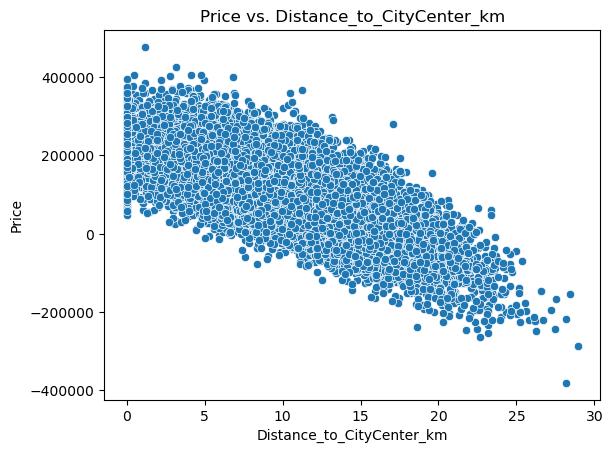

In [14]:
sns.scatterplot(x='Distance_to_CityCenter_km', y='Price', data=df)
plt.title('Price vs. Distance_to_CityCenter_km')
plt.xlabel('Distance_to_CityCenter_km')
plt.ylabel('Price')
plt.show()

In [15]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Area_sqft,20000.0,1505.568990,494.168584,400.000000,1166.861578,1503.850272,1840.953430,3739.542126
Bedrooms,20000.0,3.002400,1.409785,1.000000,2.000000,3.000000,4.000000,5.000000
Bathrooms,20000.0,1.990400,0.815010,1.000000,1.000000,2.000000,3.000000,3.000000
Age,20000.0,49.367100,29.104539,0.000000,24.000000,49.000000,75.000000,99.000000
Distance_to_CityCenter_km,20000.0,10.009403,4.899758,0.000000,6.595559,9.956475,13.348670,28.923848
Price,20000.0,112057.476870,93602.492227,-381202.864789,51313.064916,116228.390820,176861.408621,477789.462032


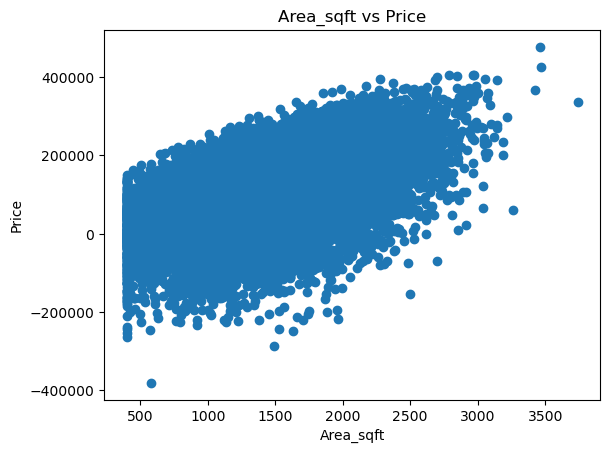

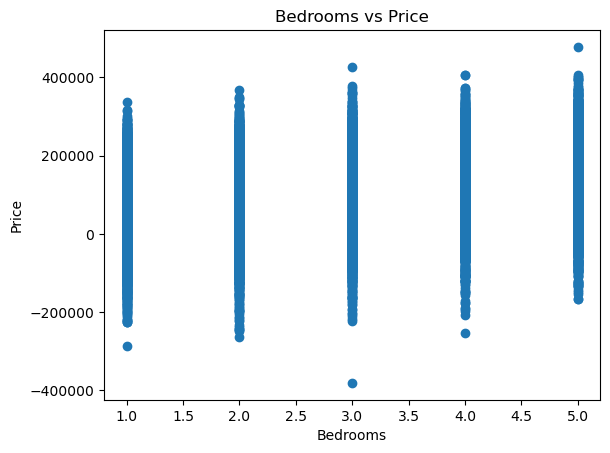

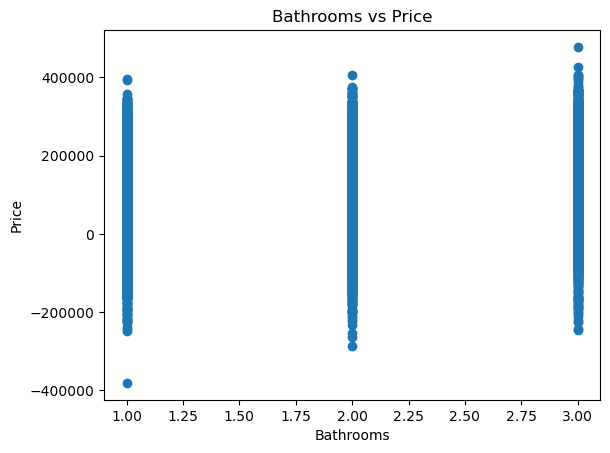

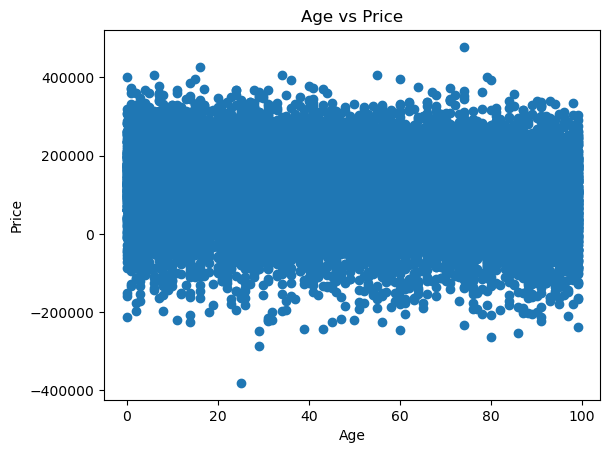

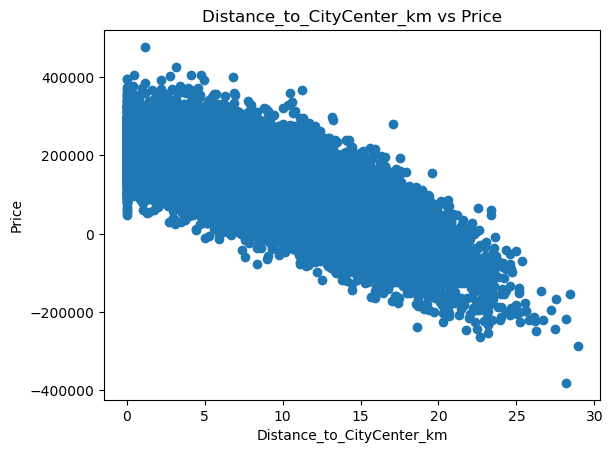

In [16]:
columns = ['Area_sqft', 'Bedrooms', 'Bathrooms', 'Age', 'Distance_to_CityCenter_km']

for col in columns:
    plt.scatter(df[col], df['Price'])
    plt.xlabel(col)
    plt.ylabel('Price')
    plt.title(f'{col} vs Price')
    plt.show()

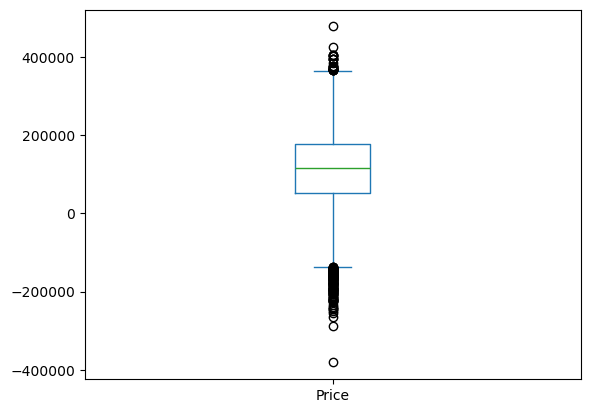

In [17]:
df['Price'].plot(kind = 'box')
plt.show()

In [19]:
Q1 = df['Price'].quantile(0.25)
Q3 = df['Price'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df = df[(df['Price'] >= lower_bound) & (df['Price'] <= upper_bound)]
print(f"After: {df.shape[0]} rows")

After: 19804 rows


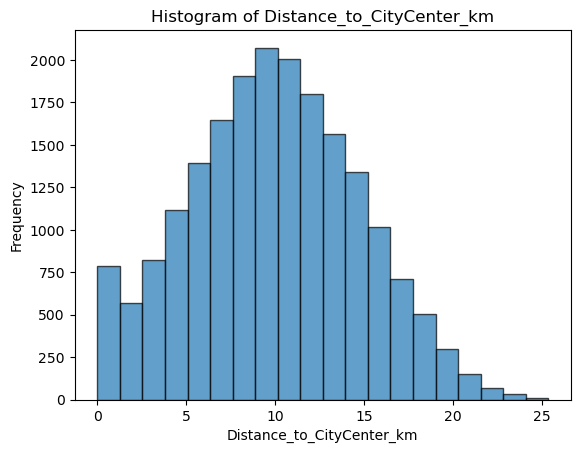

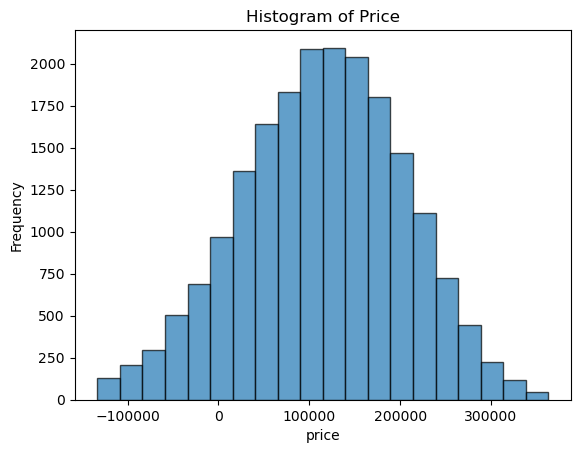

In [20]:
#Handle skewed features (e.g., log transform on Price or Distance_to_CityCenter_km if needed).


plt.hist(df['Distance_to_CityCenter_km'], bins=20, edgecolor='black', alpha=0.7)
plt.xlabel('Distance_to_CityCenter_km')
plt.ylabel('Frequency')
plt.title('Histogram of Distance_to_CityCenter_km')
plt.show()

plt.hist(df['Price'], bins=20, edgecolor='black', alpha=0.7)
plt.xlabel('price')
plt.ylabel('Frequency')
plt.title('Histogram of Price')
plt.show()

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
x = df.drop(columns=['Price']) 
y = df['Price']

In [23]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [24]:
x_train.shape

(15843, 5)

In [26]:
y_test.shape

(3961,)

In [27]:
x_train = x_train.values 
x_train

array([[8.71717332e+02, 5.00000000e+00, 3.00000000e+00, 9.00000000e+00,
        1.32688463e+01],
       [1.24769770e+03, 4.00000000e+00, 1.00000000e+00, 9.00000000e+00,
        4.35548699e+00],
       [1.71868634e+03, 5.00000000e+00, 3.00000000e+00, 1.00000000e+01,
        3.88098812e-01],
       ...,
       [1.47147942e+03, 3.00000000e+00, 2.00000000e+00, 9.30000000e+01,
        5.69412389e+00],
       [1.64293270e+03, 5.00000000e+00, 2.00000000e+00, 7.50000000e+01,
        6.20103632e+00],
       [2.08002421e+03, 5.00000000e+00, 3.00000000e+00, 4.80000000e+01,
        9.78059521e-01]])

In [28]:
x_test = x_test.values
x_test

array([[4.58764012e+02, 5.00000000e+00, 2.00000000e+00, 8.00000000e+00,
        9.31956815e+00],
       [1.27987040e+03, 1.00000000e+00, 3.00000000e+00, 3.00000000e+00,
        1.08392845e+01],
       [1.89923067e+03, 5.00000000e+00, 2.00000000e+00, 8.60000000e+01,
        1.41198210e+01],
       ...,
       [9.57087436e+02, 4.00000000e+00, 2.00000000e+00, 3.20000000e+01,
        1.39647849e+01],
       [1.75808914e+03, 1.00000000e+00, 3.00000000e+00, 9.90000000e+01,
        1.38392699e+01],
       [1.17499871e+03, 5.00000000e+00, 1.00000000e+00, 2.30000000e+01,
        1.44416710e+01]])

In [29]:
y_train = y_train.values
y_train

array([ 61459.63221315, 198006.5734433 , 296657.50094342, ...,
       132284.48003816, 200691.84450307, 324977.4111748 ])

In [30]:
y_test = y_test.values
y_test

array([103057.96551533, 100846.93948323, 113299.2245232 , ...,
        45855.67880317,  -5270.3831909 ,  77343.2258591 ])

In [31]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [32]:
lr = LinearRegression()

In [33]:
lr.fit(x_train, y_train)

LinearRegression()

In [34]:
pr = lr.predict(x_test)

In [35]:
r2_score(y_test, pr)

0.9362257010915378

In [36]:
df.head(3)

,Area_sqft,Bedrooms,Bathrooms,Age,Distance_to_CityCenter_km,Price
0,1748.357077,1,1,43,11.268221,74482.867074
1,1430.867849,2,1,39,8.342830,93659.178143
2,1823.844269,1,2,29,4.716948,178618.576486


In [37]:
A = lr.predict([[1748.357077, 1, 1, 43, 11.268221]])
B = lr.predict([[1430.867849, 2, 1, 39, 8.342830]])
C = lr.predict([[1823.844269, 1, 2, 29, 4.716948]])
print(A)
print(B)
print(C)

[67460.09557583]
[98146.00157873]
[187067.42966517]


# Applying poly regression

In [39]:
from sklearn.preprocessing import PolynomialFeatures

In [40]:
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(x)
lin2 = LinearRegression()
lin2.fit(X_poly, y)

LinearRegression()

In [42]:
X_test_poly = poly.transform(x_test)
pr = lin2.predict(X_test_poly)
r2 = r2_score(y_test, pr)
r2

C:\Users\Ashu\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


0.9499972649818841

In [43]:
a = lin2.predict(poly.transform([[1748.357077, 1, 1, 43, 11.268221]]))
b = lin2.predict(poly.transform([[1430.867849, 2, 1, 39, 8.342830]]))
c = lin2.predict(poly.transform([[1823.844269, 1, 2, 29, 4.716948]]))
print(a)
print(b)
print(c)

[75741.58986597]
[105477.00108635]
[185289.76432855]


C:\Users\Ashu\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
C:\Users\Ashu\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
C:\Users\Ashu\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
